<a href="https://colab.research.google.com/github/rafysp/PCVK_Ganjil_23-24/blob/main/Week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M. Rafy Shah Pahlevi / 2141720244

### TUGAS PRAKTIKUM


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)


<BarContainer object of 256 artists>

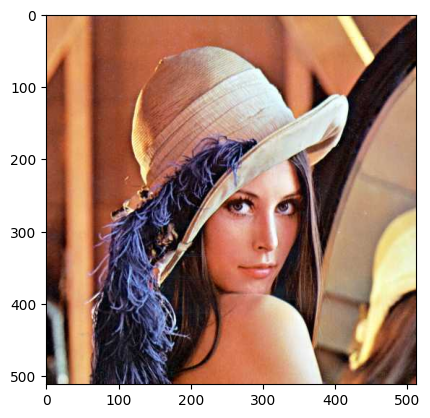

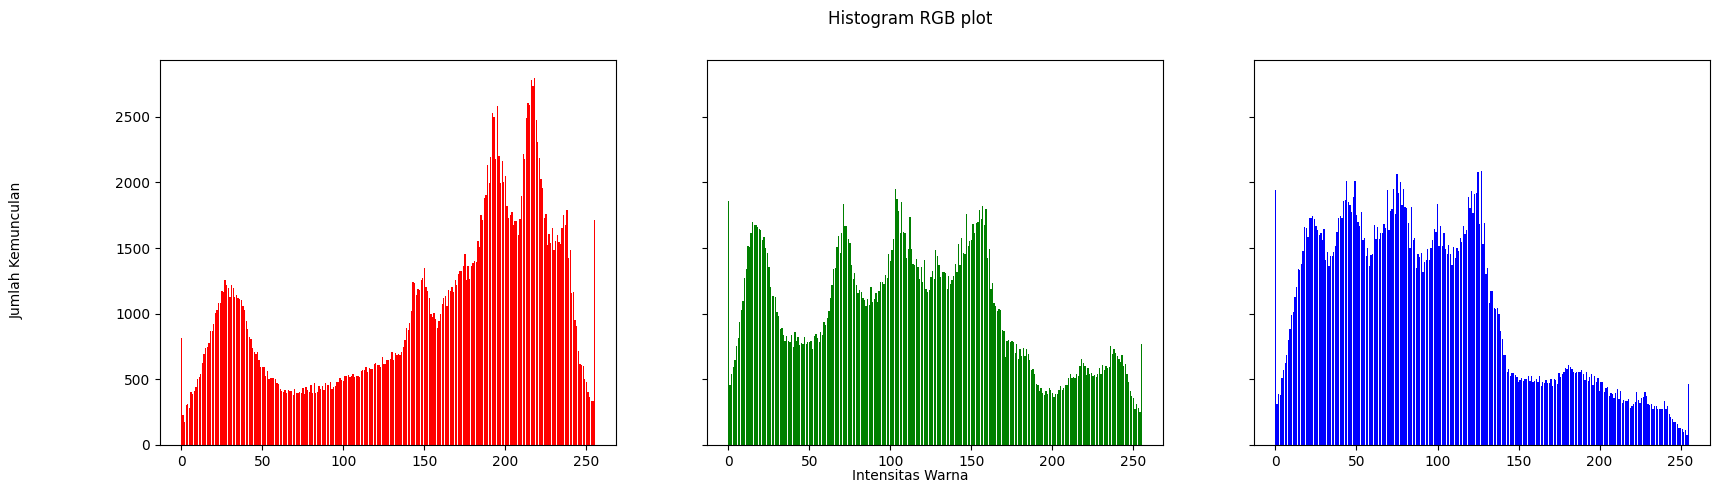

In [5]:
import cv2

# Baca citra Lena
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)
plt.imshow(img_rgb)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


4. . Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


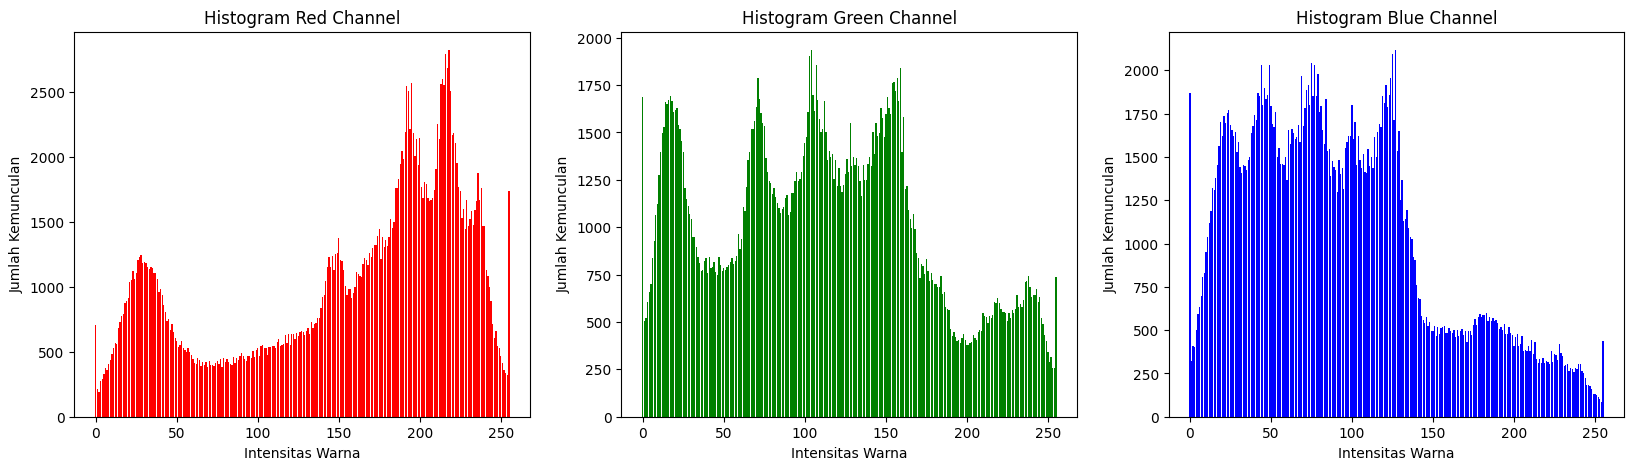

In [ ]:
img_1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/Lenna.jpg')

# Ubah format citra dari BGR ke RGB
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Hitung histogram menggunakan NumPy
hist_blue = np.histogram(img_1[:,:,0], bins=256, range=(0,256))
hist_green = np.histogram(img_1[:,:,1], bins=256, range=(0,256))
hist_red = np.histogram(img_1[:,:,2], bins=256, range=(0,256))

# Plot histogram
plt.figure(figsize=[20,5])
plt.subplot(131)
plt.bar(hist_red[1][:-1], hist_red[0], color='red')
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(132)
plt.bar(hist_green[1][:-1], hist_green[0], color='green')
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(133)
plt.bar(hist_blue[1][:-1], hist_blue[0], color='blue')
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.show()


Melihat output diatas, hasilnya adalah sama seperti yang sudah didapatkan pada no 3. Perbedaanya terletak pada perhitungan histogram dan kemudian menggunakan matplotlib untuk plot histogramnya

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

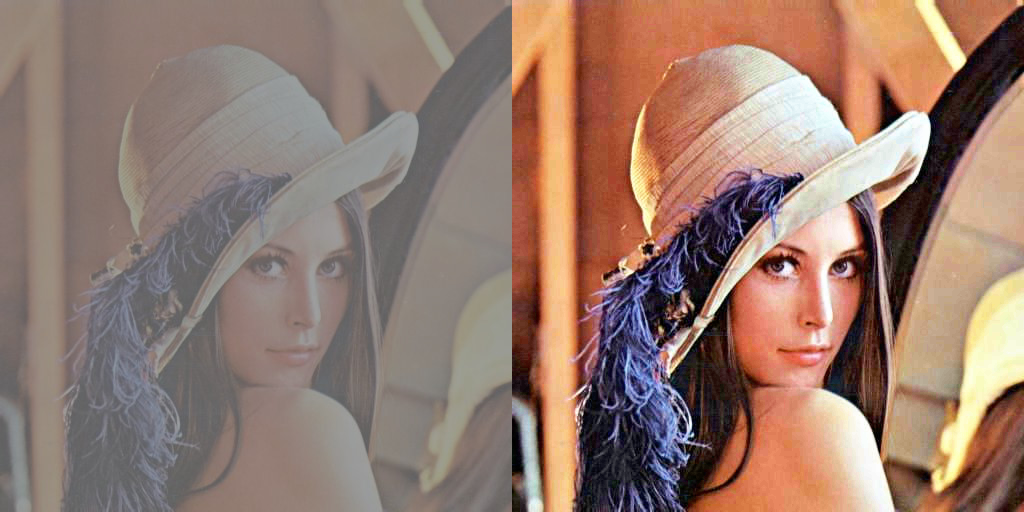

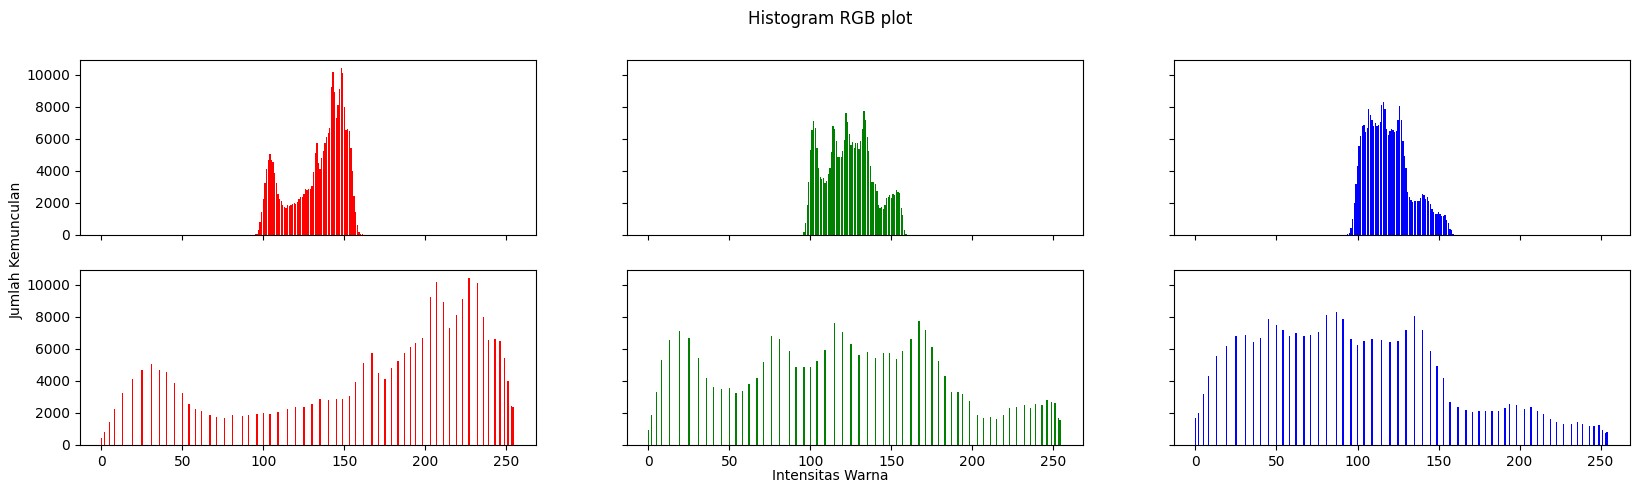

In [ ]:
# Membaca citra
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/lena_lc.jpg')

def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
# Check if the image is grayscale or color
if img1.shape[-1] == 1:
    # Grayscale image
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')
else:
    # Color image
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

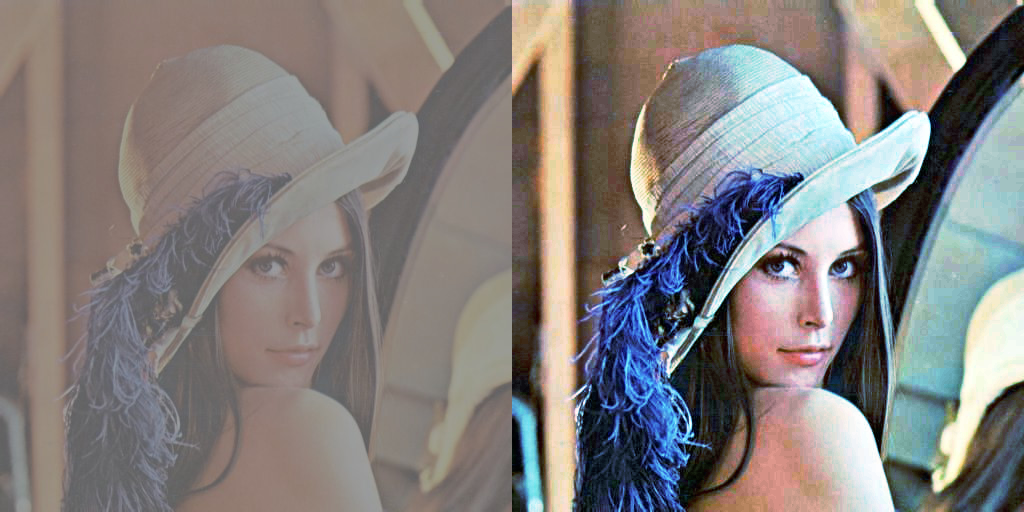

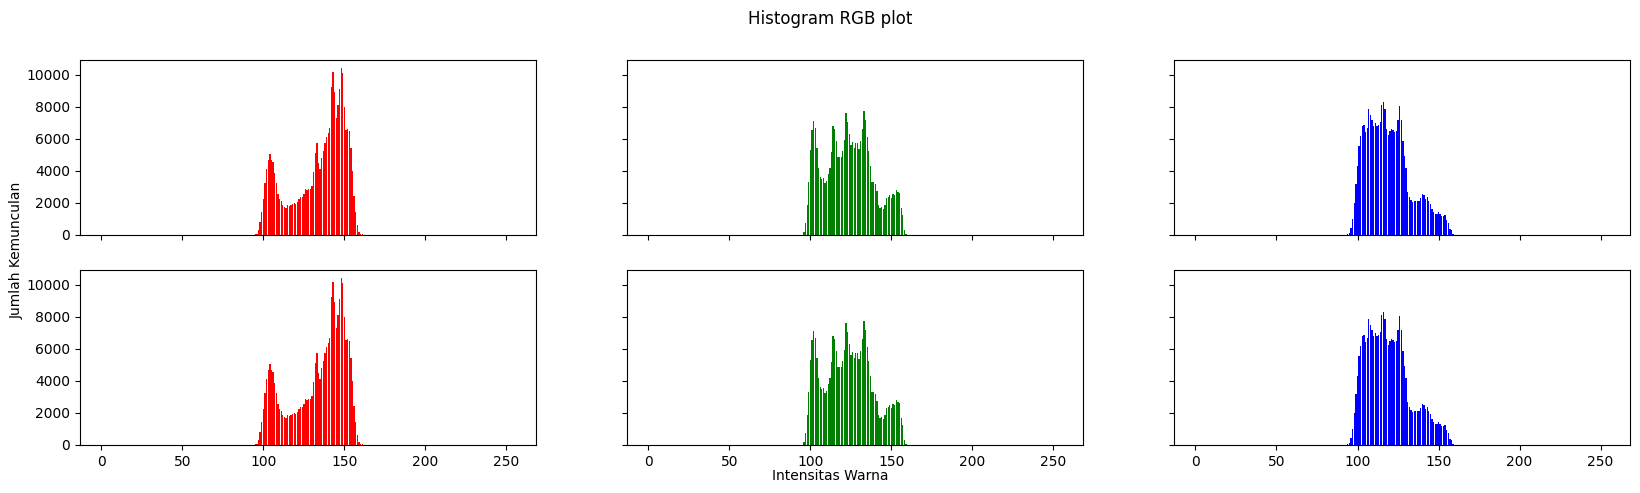

In [ ]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

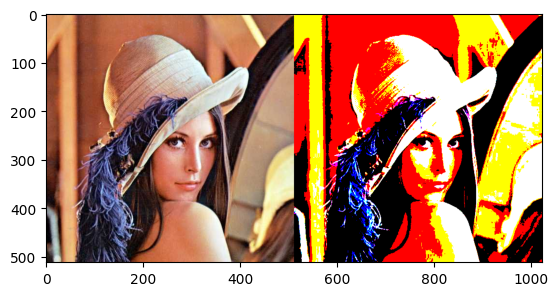

In [ ]:
lena_original = plt.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/Lenna.jpg')

def WarnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  WarnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(WarnaPallette)):
    rDiff = r - WarnaPallette[i][0]
    gDiff = g - WarnaPallette[i][1]
    bDiff = b - WarnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

WarnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = lena_original
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = WarnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = WarnaPallette[baru]

final_frame = cv.hconcat((img_16jt, img_8))
plt.imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

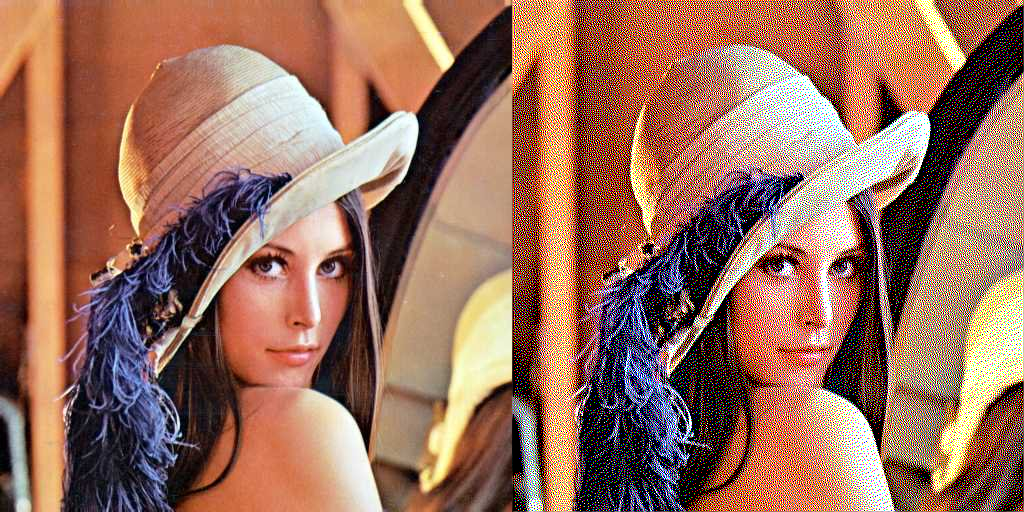

In [ ]:
lena_dithering = cv.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/Lenna.jpg')
image_after = lena_dithering.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]

    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            b = img[y, x, 0]
            g = img[y, x, 1]
            r = img[y, x, 2]

            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new_b = np.round(jarakPixel * b/255.0) * (255/jarakPixel)
            new_g = np.round(jarakPixel * g/255.0) * (255/jarakPixel)
            new_r = np.round(jarakPixel * r/255.0) * (255/jarakPixel)

            img[y, x, 0] = new_b
            img[y, x, 1] = new_g
            img[y, x, 2] = new_r

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error_b = b - new_b
            quant_error_g = g - new_g
            quant_error_r = r - new_r

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1, 0] = minmax(img[y, x+1, 0] + quant_error_b * 7 / 16.0)
            img[y, x+1, 1] = minmax(img[y, x+1, 1] + quant_error_g * 7 / 16.0)
            img[y, x+1, 2] = minmax(img[y, x+1, 2] + quant_error_r * 7 / 16.0)

            img[y+1, x-1, 0] = minmax(img[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            img[y+1, x-1, 1] = minmax(img[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            img[y+1, x-1, 2] = minmax(img[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            img[y+1, x, 0] = minmax(img[y+1, x, 0] + quant_error_b * 5 / 16.0)
            img[y+1, x, 1] = minmax(img[y+1, x, 1] + quant_error_g * 5 / 16.0)
            img[y+1, x, 2] = minmax(img[y+1, x, 2] + quant_error_r * 5 / 16.0)


            img[y+1, x+1, 0] = minmax(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            img[y+1, x+1, 1] = minmax(img[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            img[y+1, x+1, 2] = minmax(img[y+1, x+1, 2] + quant_error_r * 1 / 16.0)

    return img

image_after = dithering_color(image_after, 1)
final_frame = cv.hconcat((lena_dithering, image_after))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

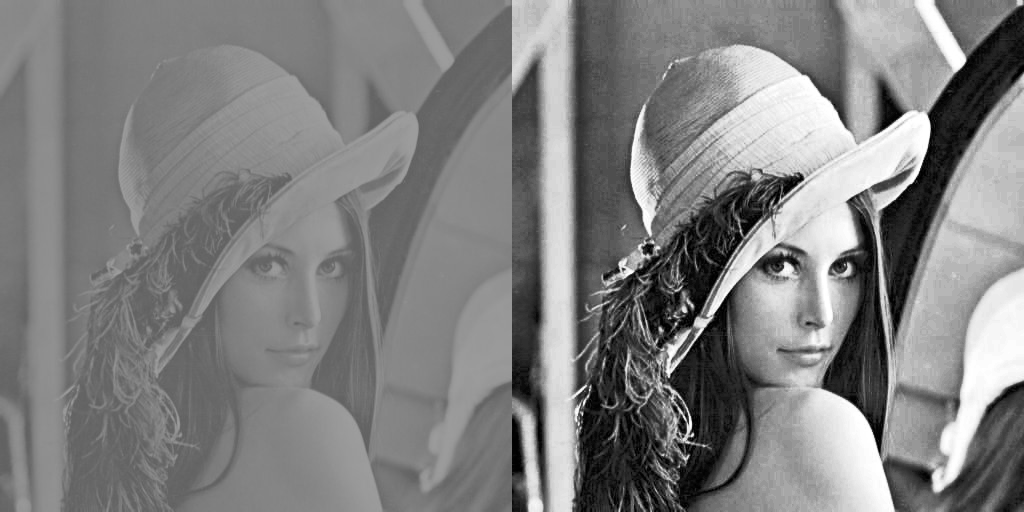

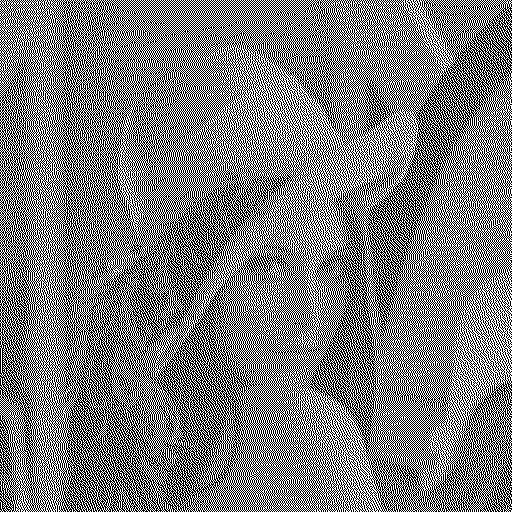

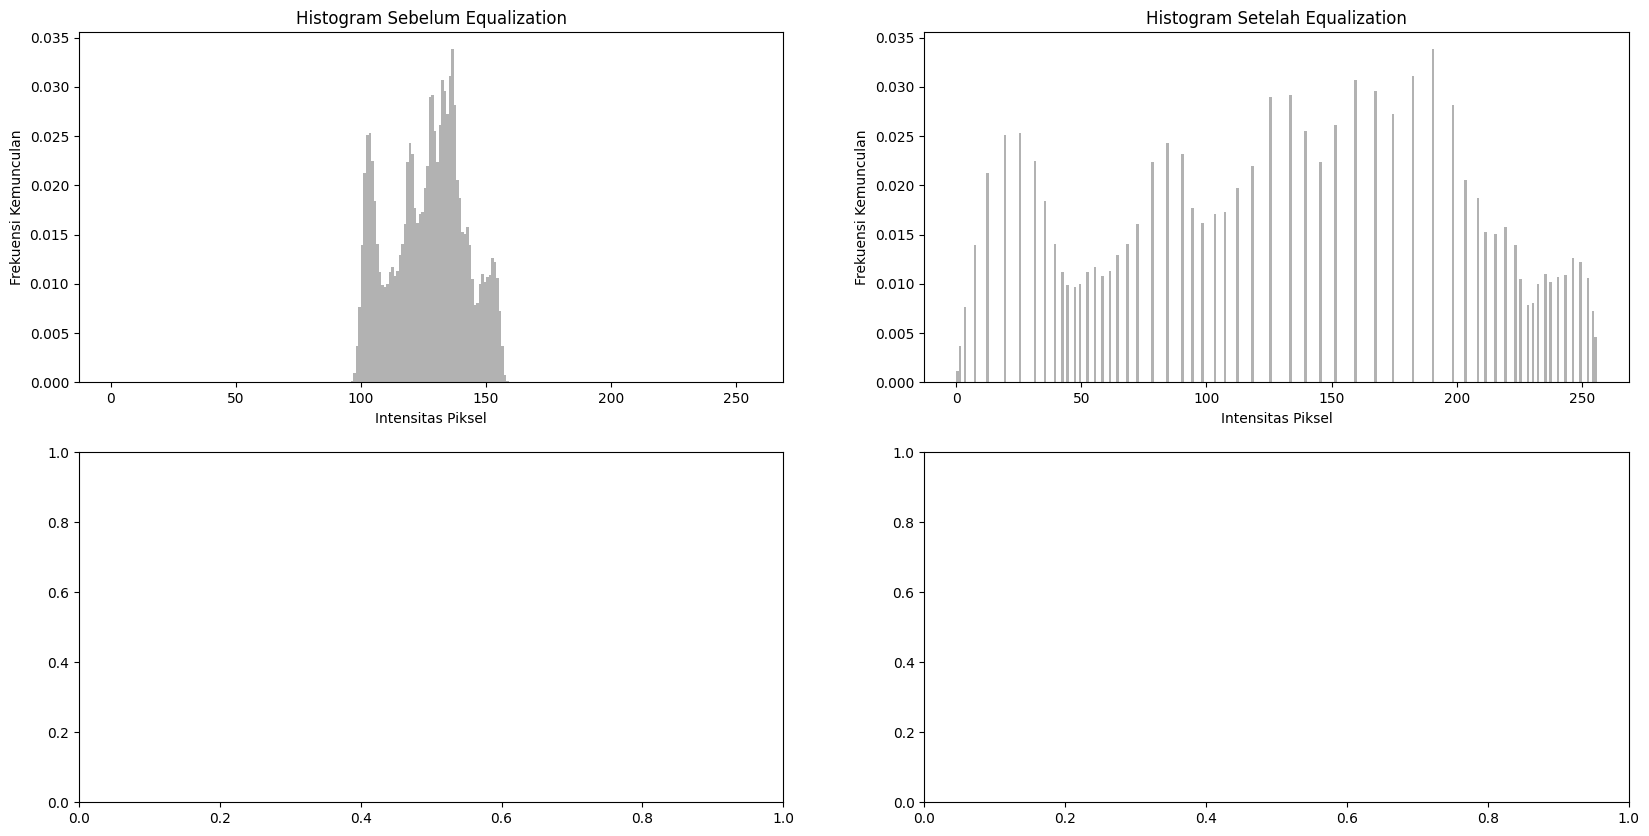

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/smt 5 pcvk/images/lena_lc.jpg')
img_gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if old_value > 128:
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if x < Width - 1:
            NewNumber = GrayImage[y, x + 1] + Error * 7 // 16
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y, x + 1] = NewNumber

        if x > 0 and y < Height - 1:
            NewNumber = GrayImage[y + 1, x - 1] + Error * 3 // 16
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y + 1, x - 1] = NewNumber

        if y < Height - 1:
            NewNumber = GrayImage[y + 1, x] + Error * 5 // 16
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y + 1, x] = NewNumber

        if y < Height - 1 and x < Width - 1:
            NewNumber = GrayImage[y + 1, x + 1] + Error * 1 // 16
            if NewNumber > 255:
                NewNumber = 255
            elif NewNumber < 0:
                NewNumber = 0
            GrayImage[y + 1, x + 1] = NewNumber

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(img_gray.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.6)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Histogram Sebelum Equalization')

# Equalization
img_equalized = cv2.equalizeHist(img_gray)

# Menampilkan histogram setelah histogram equalization
plt.subplot(2, 2, 2)
plt.hist(img_equalized.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.6)
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Histogram Setelah Equalization')

plt.subplot(2, 2, 3)
final_frame = cv2.hconcat((img_gray, img_equalized))
cv2_imshow(final_frame)

plt.subplot(2, 2, 4)
cv2_imshow(GrayImage)